###Cargar el repositorio desde Github
Upload the github repository with all the code modules

In [ ]:
import sys
sys.path.append('/content/RL_comp_modeling')

In [ ]:
!git clone https://github.com/Alicia-MJ/RL_comp_modeling.git

Cloning into 'RL_comp_modeling'...
remote: Enumerating objects: 1194, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 1194 (delta 71), reused 65 (delta 35), pack-reused 1023 (from 1)
Receiving objects: 100% (1194/1194), 25.43 MiB | 18.69 MiB/s, done.
Resolving deltas: 100% (679/679), done.


### Cragar las librerías y métodos específicos
Upload the packages and specific methods

In [ ]:

from neuronav.envs.grid_env import GridEnv, GridSize, GridObservation
from neuronav.agents.td_agents import TDSR, TDSR_RP, TDSR_AB
from neuronav.agents.dyna_agents import DynaSR, DynaSR_RP, DynaSR_AB
from neuronav.envs.grid_templates import GridTemplate
from neuronav.utils import run_episode, plot_values_and_policy, plot_values_and_policy_half
import matplotlib.pyplot as plt
import numpy as np
import time


%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.10/dist-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


# **Tarea experimental: Cliff Walking**
Cliff Walking Task


# **Se define el entorno (env)**.
The virtual environment is defined.

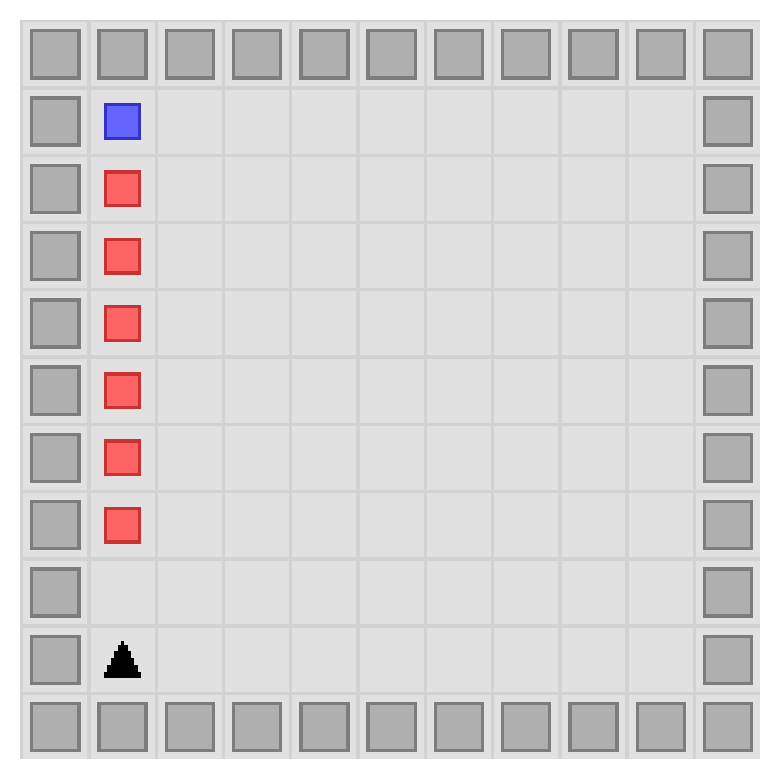

In [ ]:
reward_map = {(1, 1): 1.0,  (7, 1): -1.0, (6, 1): -1.0, (5, 1): -1.0, (4, 1): -1.0, (3, 1): -1.0, (2, 1): -1.0}
start_pos = (9, 1)

env = GridEnv(size=GridSize.small)

obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
env.render()

## Evaluación del impacto de la sensibilidad a los castigos

Se implementó el modelo **Dyna $\beta$-pessimistic SR** con diferentes valores en en el parámetro de sensibilidad a las recompensas ($ω$) y su complemento (1-$\omega$), el parámetro de sensibilidad a los castigos, con el fin de evaluar el impacto de los distintos valores en el desarrollo de conductas asociadas a la ansiedad como la evitación, la aversión al riesgo, la sobreestimación y generalización del peligro. Se programaron 3 agentes diferentes y por cada uno se imprimió un mapa de calor del entorno de acuerdo a los valores estimados de cada estado, así como una gráfica del número de pasos temporales por episodio y la recompensa obtenida por episodio.



**English**


*The Dyna $\beta$-pessimistic SR model was implemented with different values for the reward sensitivity parameter ($\omega$) and its complement (1-$\omega$), the punishment sensitivity parameter, to evaluate the impact of these values on the development of anxiety-related behaviors such as avoidance, risk aversion, overestimation, and generalization of danger. Three different agents were programmed, and for each one, a heatmap of the environment based on the estimated values for each state was generated, along with a graph showing the number of time steps per episode and the reward obtained per episode.*

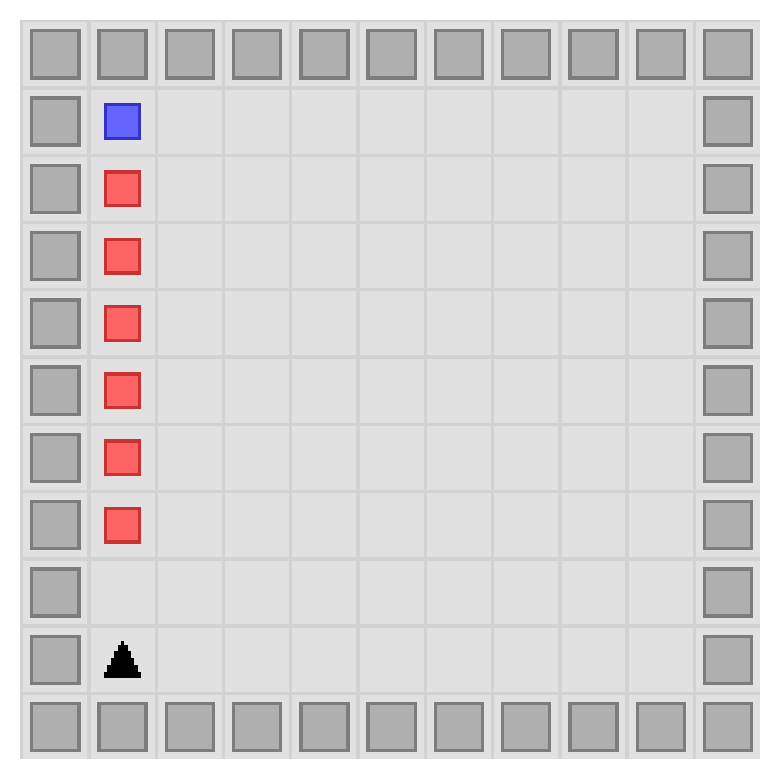

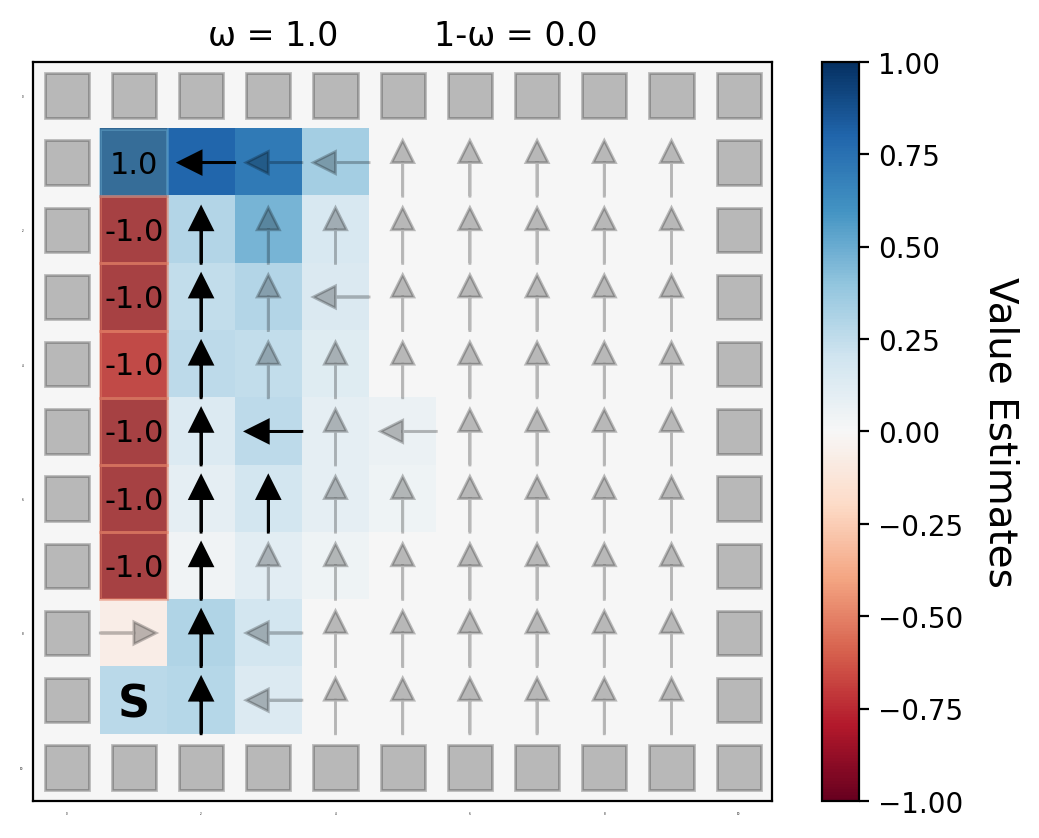

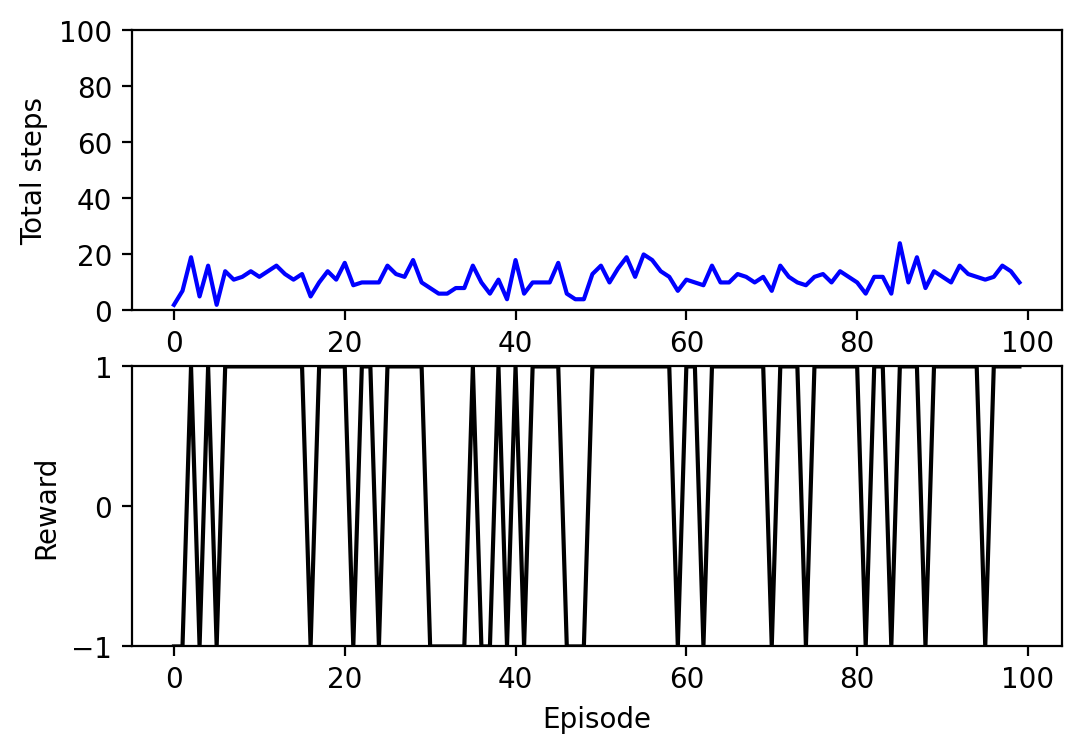

W is 1.0


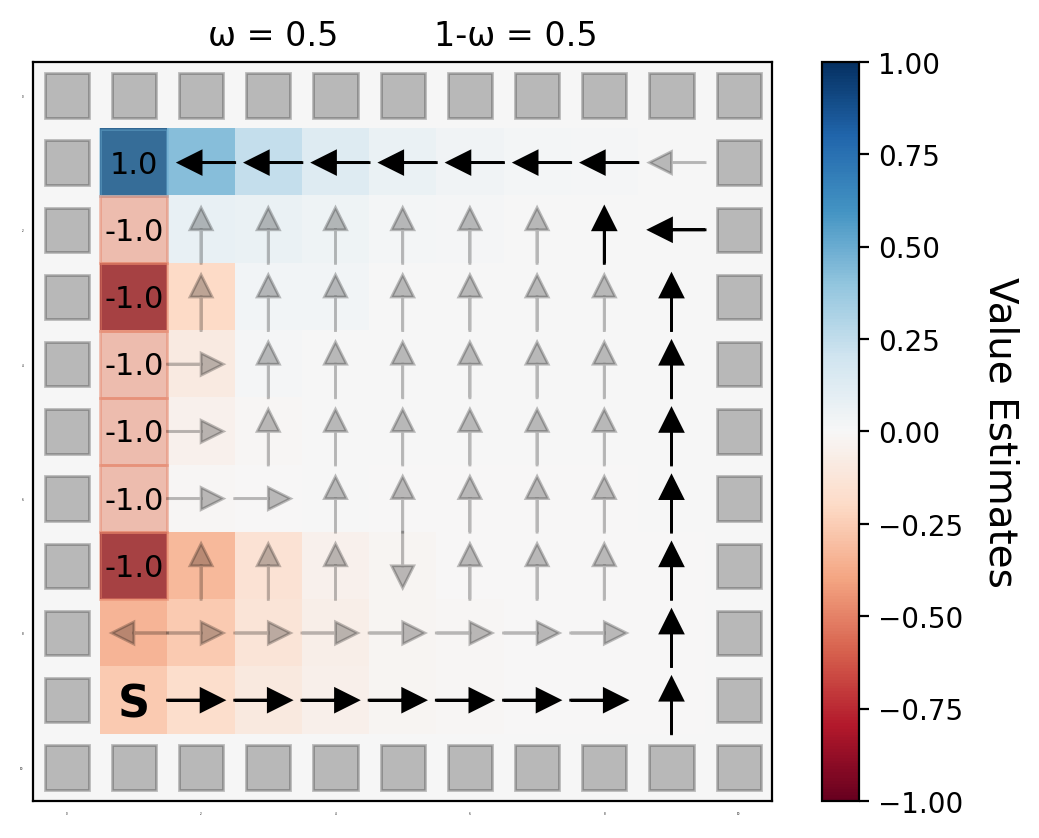

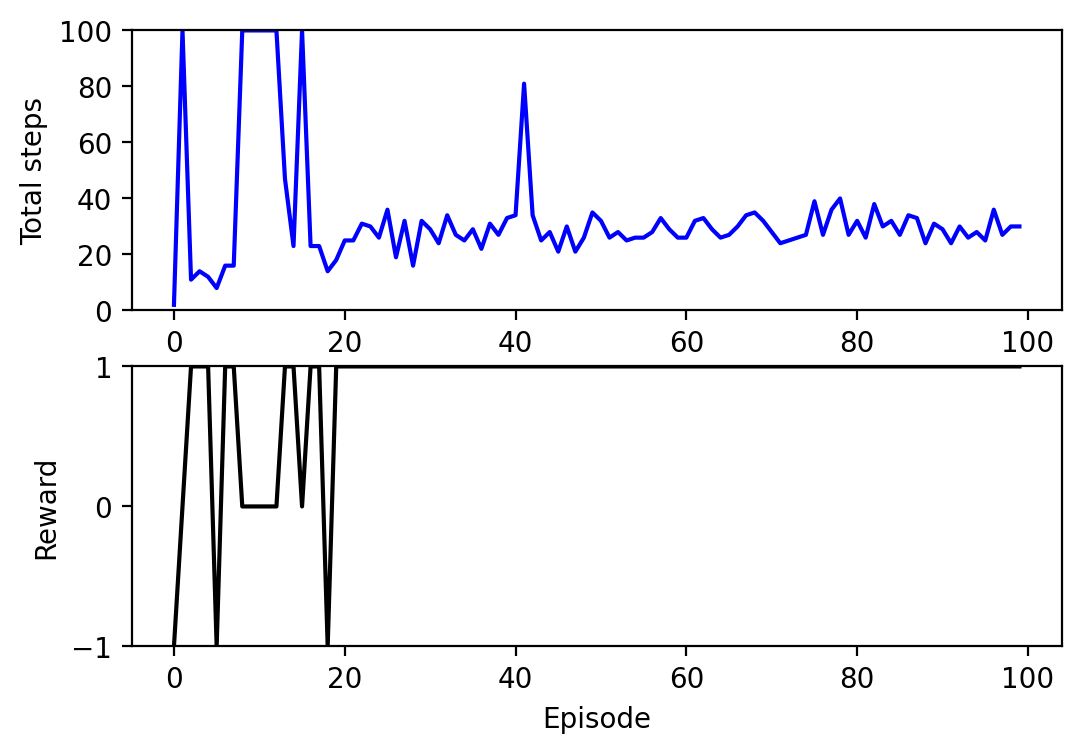

W is 0.5


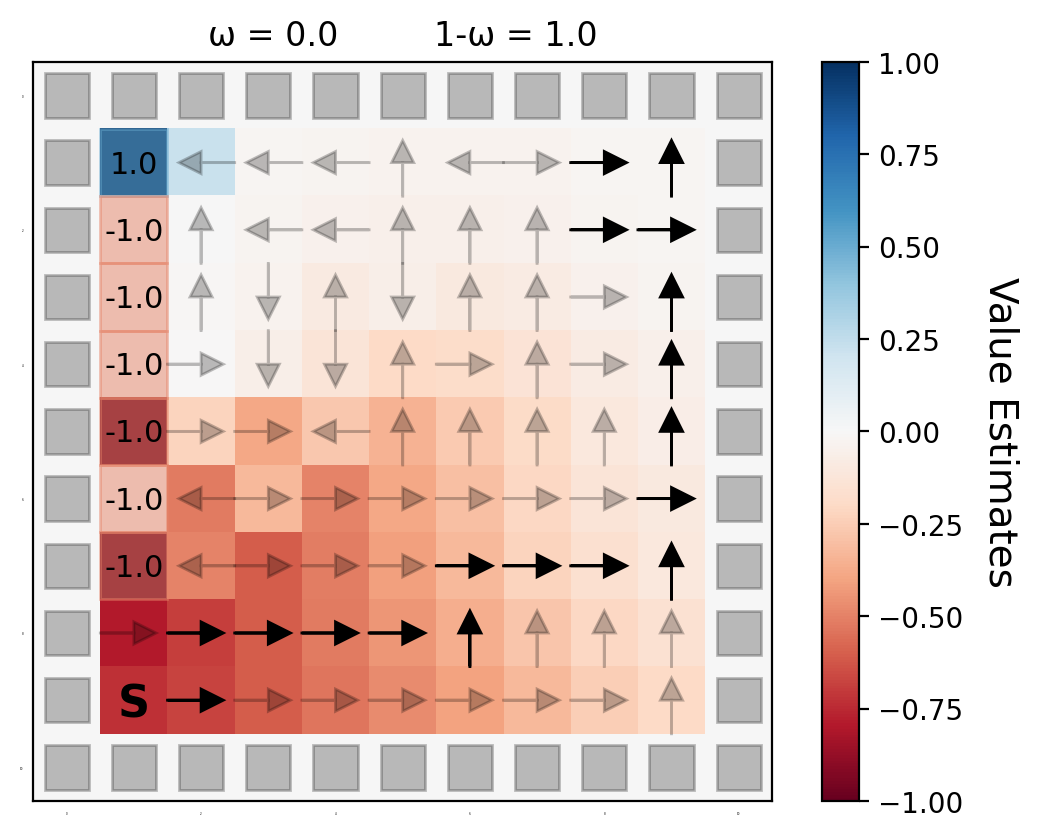

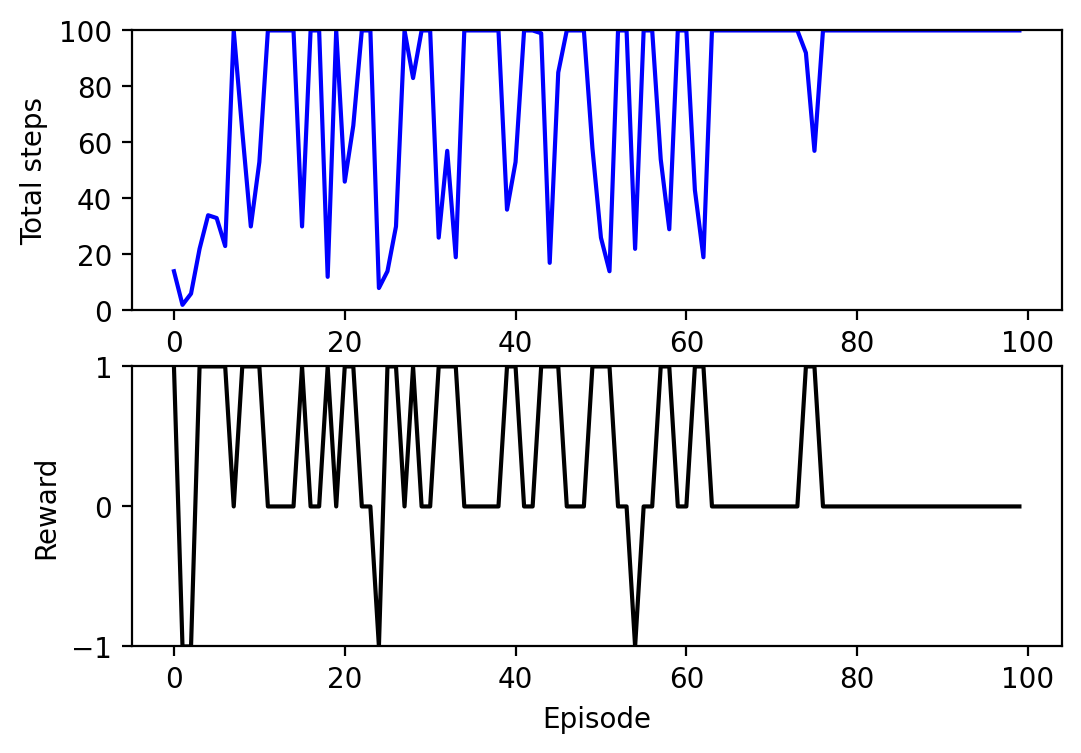

W is 0.0
Tiempo total de ejecución para 100 episodios: 10.783768653869629 segundos


In [ ]:
num_episodes = 100
max_steps = 100
w_values = [1.0, 0.5, 0.0]
num_recall = 4


reward_map = {(1, 1): 1.0,  (7, 1): -1.0, (6, 1): -1.0, (5, 1): -1.0, (4, 1): -1.0, (3, 1): -1.0, (2, 1): -1.0}
start_pos = (9, 1)

env = GridEnv(size=GridSize.small)

obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
env.render()

start_time = time.time()

for w_value in w_values:


    agent = DynaSR(
        env.state_size,
        env.action_space.n,
        lr=0.1,
        gamma=0.9,
        poltype="egp",
        epsilon=0.2,
        w_value=w_value,
        num_recall=num_recall
    )

    total_steps = []
    tot_returns = []


    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env, agent, max_steps=max_steps, objects={"rewards": reward_map}, start_pos=start_pos
        )
        tot_returns.append(ep_return)
        total_steps.append(steps)

    pw = 1-w_value

    plot_values_and_policy(agent, env, start_pos, f"ω = {w_value}         1-ω = {pw}", objects={"rewards": reward_map})

    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 4))
    ax1.plot(total_steps, color="blue")
    ax1.set_ylabel('Total steps')
    ax1.set_xlabel('Episode')
    ax1.set_ylim(0,100)

    ax2.plot(tot_returns, color="black")
    ax2.set_ylabel('Reward')
    ax2.set_xlabel('Episode')
    ax2.set_ylim(-1,1)
    ax2.set_yticks([-1, 0, 1])

    plt.show()

    print(f'W is {w_value}')

# Fin del temporizador
end_time = time.time()

# Cálculo del tiempo total de ejecución en segundos
total_time = end_time - start_time
print(f"Tiempo total de ejecución para {num_episodes} episodios: {total_time} segundos")

## **Evaluación del impacto de la tasa de aprendizaje a los castigos**

Se implementó el modelo **Dyna $\alpha$-SR** con diferentes valores en la tasa de aprendizaje a los castigos, con el fin de evaluar el impacto de los distintos valores en el desarrollo de conductas asociadas a la ansiedad como la evitación, la aversión al riesgo, la sobreestimación y generalización del peligro. Se programaron 3 agentes diferentes y por cada uno se imprimió un mapa de calor del entorno de acuerdo a los valores estimados de cada estado, así como una gráfica del número de pasos temporales por episodio y la recompensa obtenida por episodio.

**English**

*The Dyna $\alpha$-SR model was implemented with different values for the punishment learning rate to evaluate the impact of these values on the development of anxiety-related behaviors such as avoidance, risk aversion, overestimation, and generalization of danger. Three different agents were programmed, and for each one, a heatmap of the environment based on the estimated values for each state was generated, along with a graph showing the number of time steps per episode and the reward obtained per episode.*

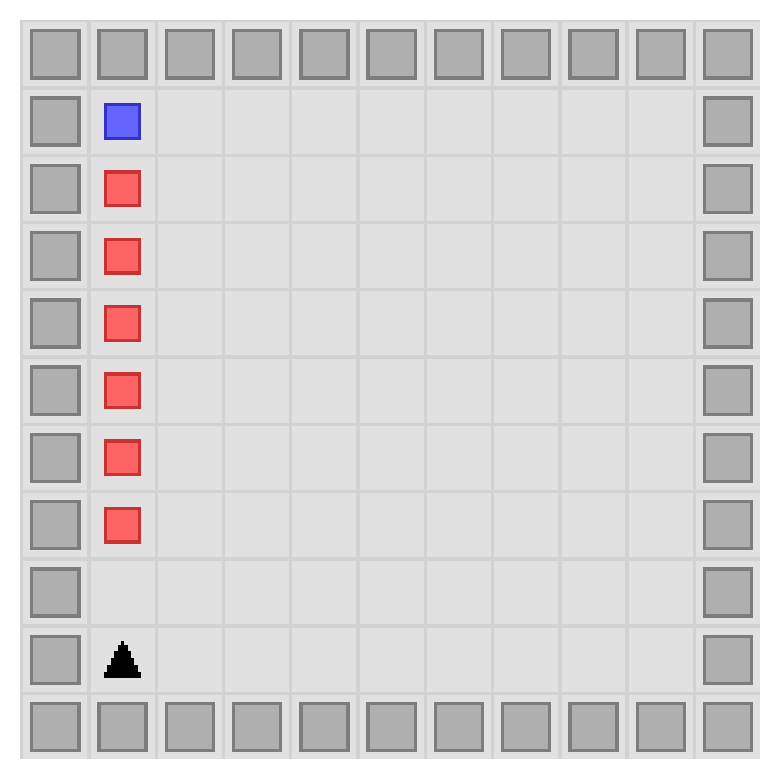

lr_p is 0.1
lr_p is 0.15
lr_p is 0.2
Tiempo total de ejecución para 100 episodios: 3.728166103363037 segundos


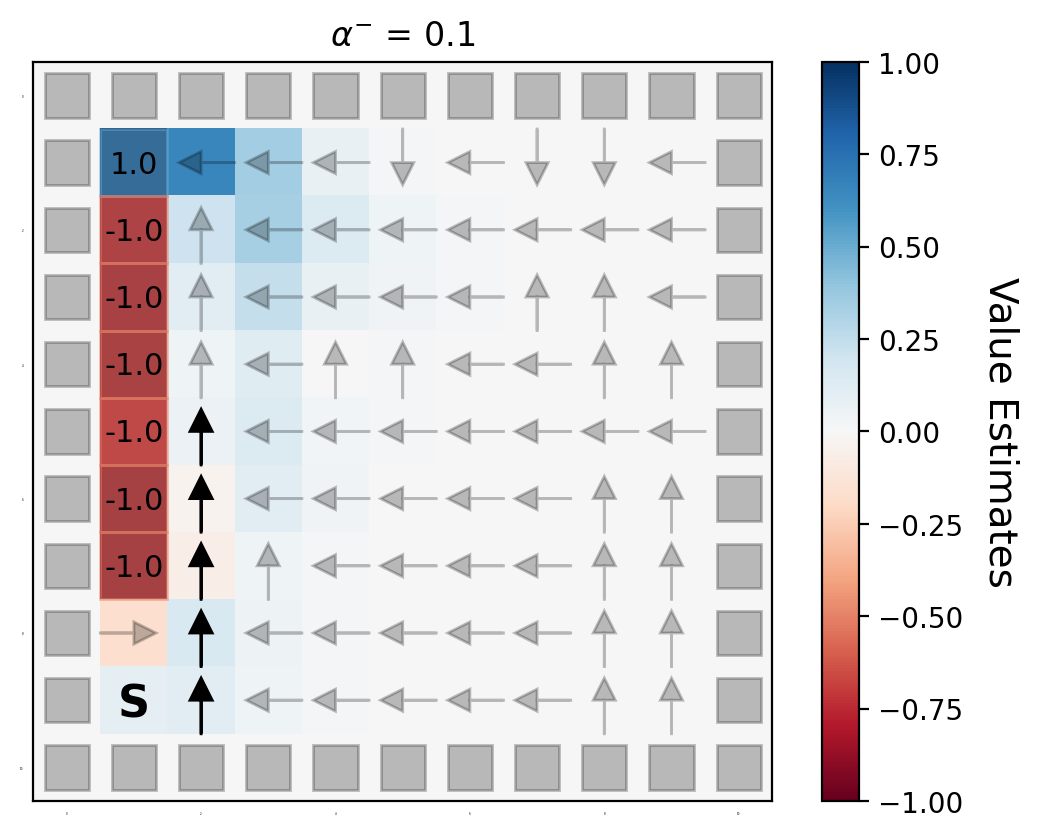

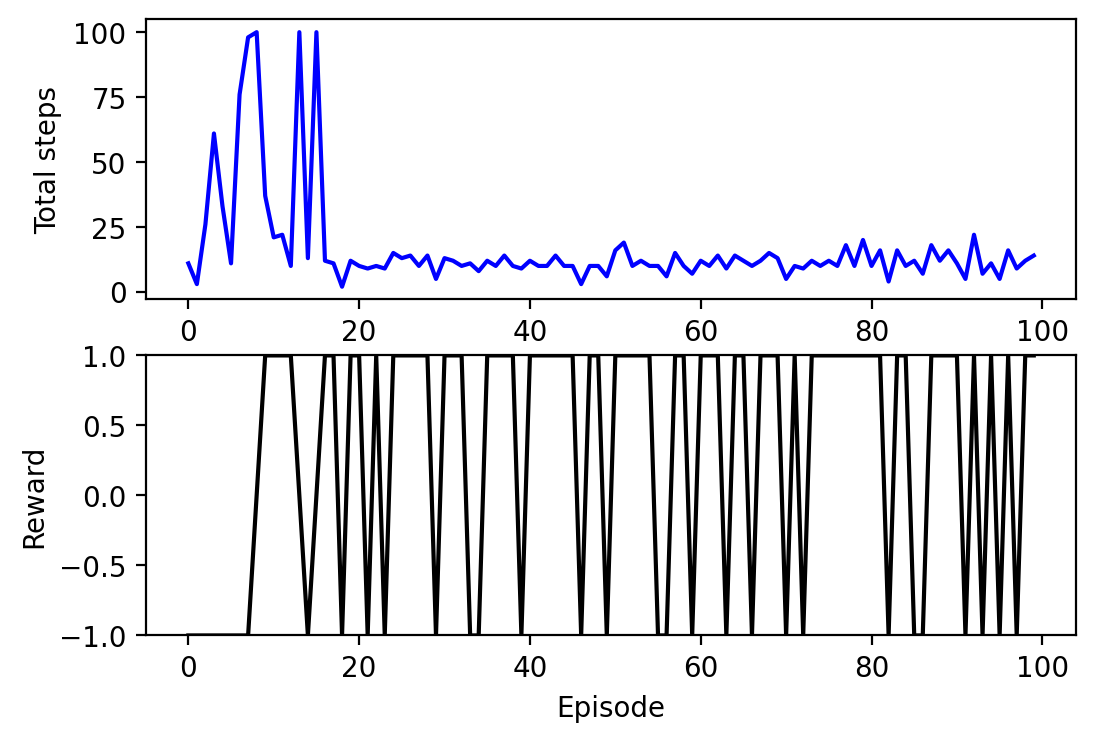

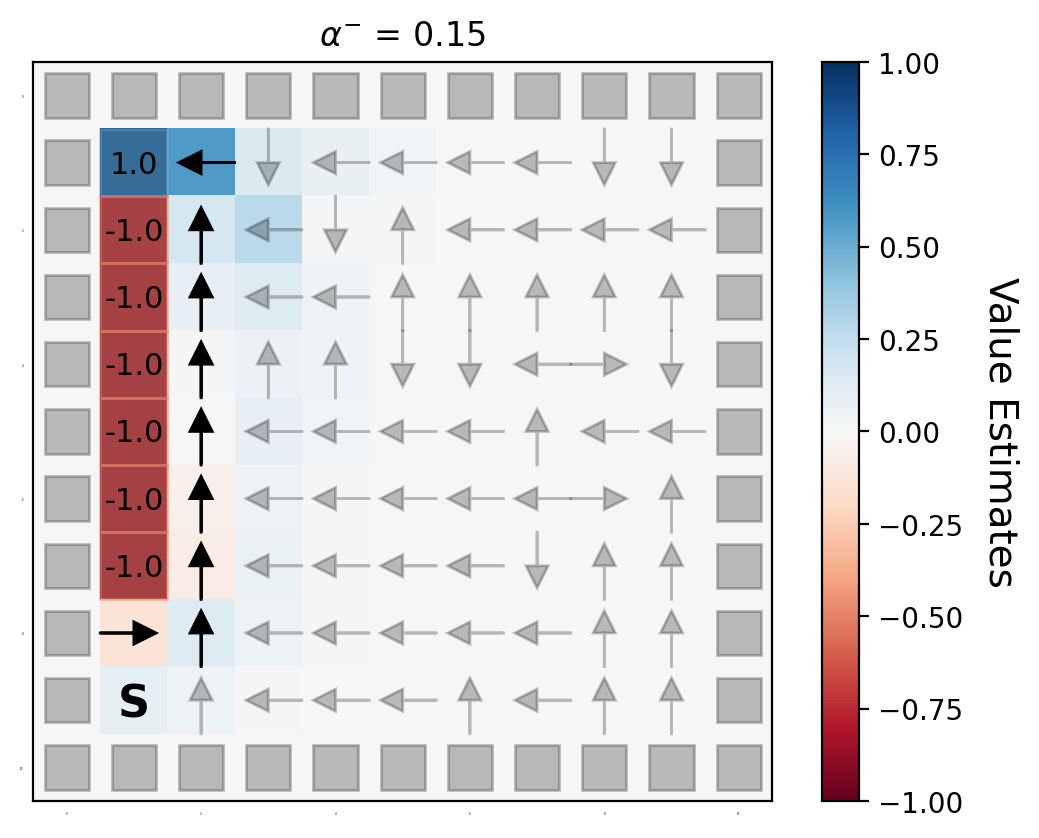

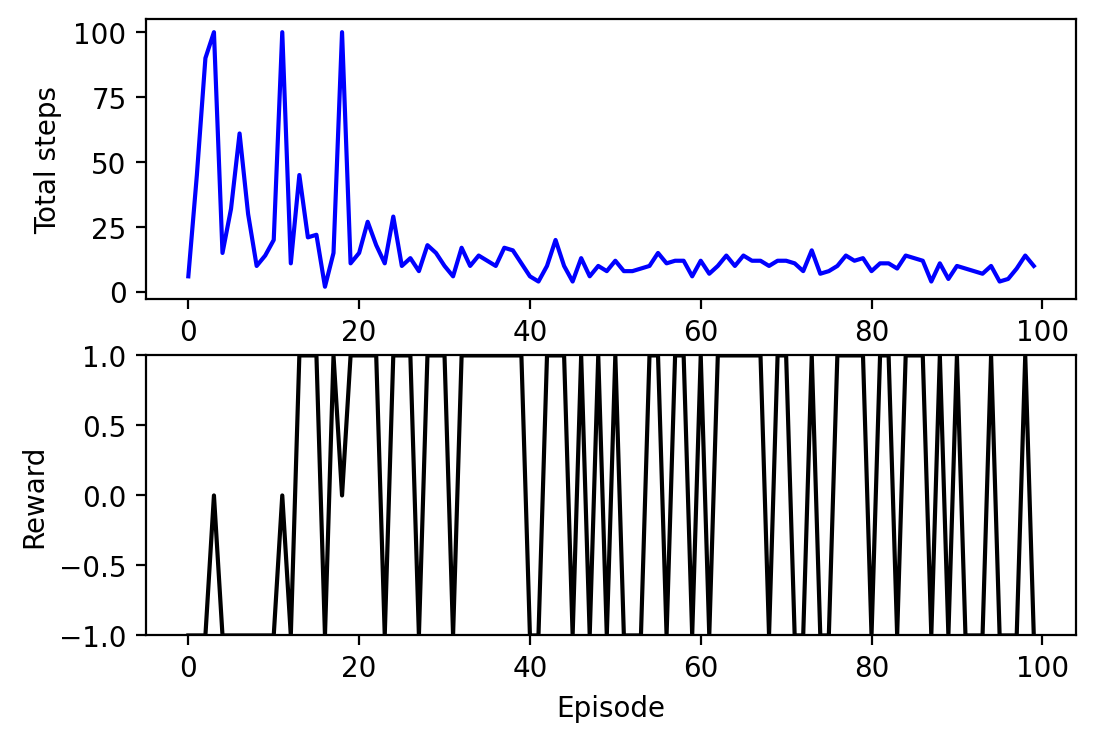

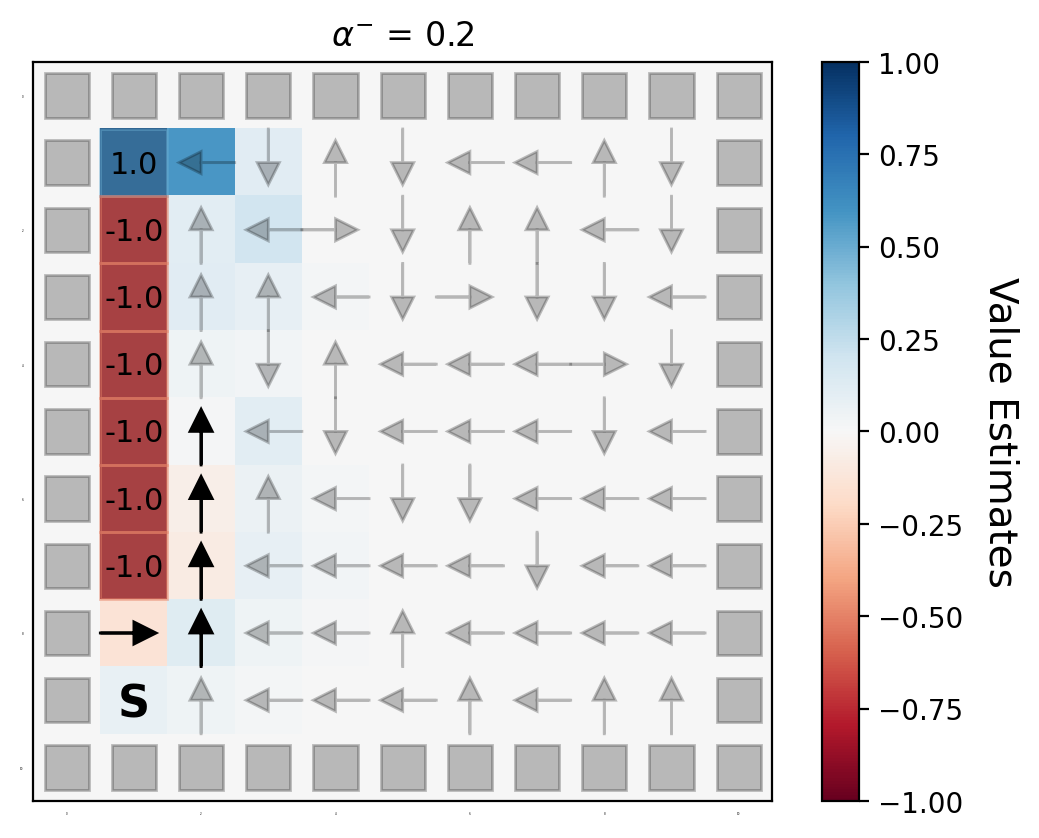

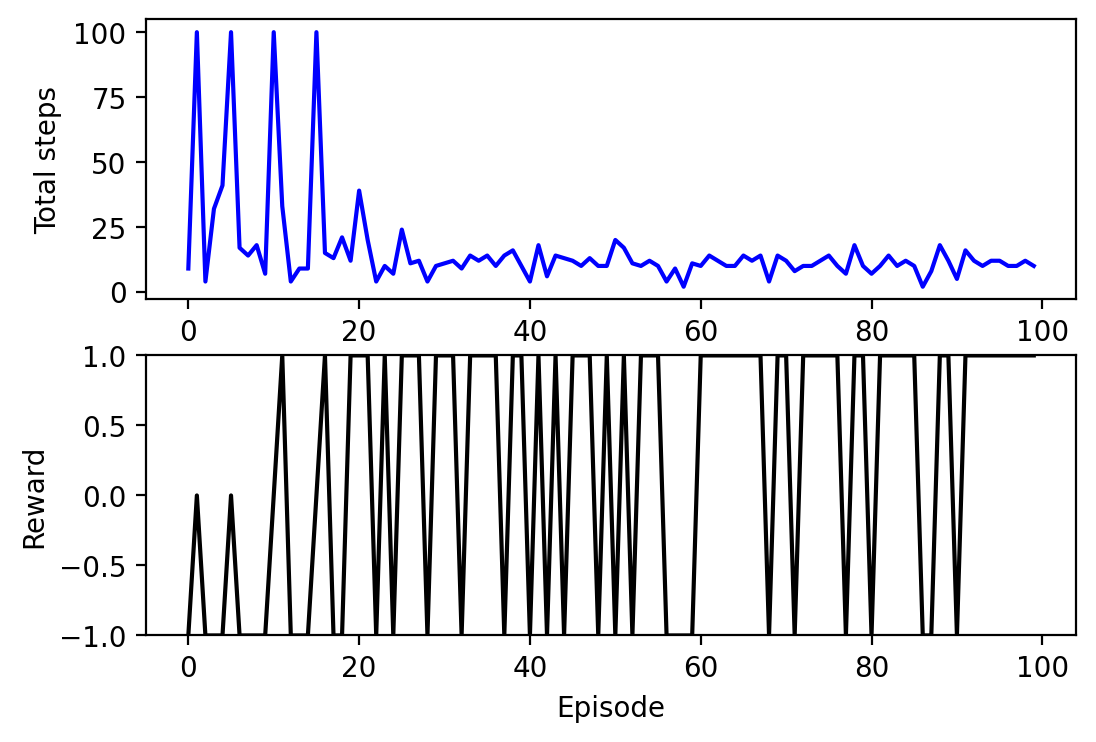

In [ ]:
num_episodes = 100
max_steps = 100
lr_p_values = [0.1, 0.15, 0.2]
num_recall = 4

reward_map = {(1, 1): 1.0, (7, 1): -1.0, (6, 1): -1.0, (5, 1): -1.0, (4, 1): -1.0, (3, 1): -1.0, (2, 1): -1.0}
start_pos = (9, 1)

env = GridEnv(size=GridSize.small)

obs = env.reset(objects={"rewards": reward_map}, agent_pos=start_pos)
env.render()

start_time = time.time()

for lr_p in lr_p_values:


    agent = DynaSR_RP(
        env.state_size,
        env.action_space.n,
        lr=0.1,
        gamma=0.9,
        poltype="egreedy",
        epsilon=0.2,
        num_recall=num_recall,
        lr_p=lr_p
    )

    total_steps = []
    tot_returns = []

    for i in range(num_episodes):
        agent, steps, ep_return = run_episode(
            env, agent, max_steps=max_steps, objects={"rewards": reward_map}, start_pos=start_pos
        )
        tot_returns.append(ep_return)
        total_steps.append(steps)

    plot_values_and_policy(agent, env, start_pos, f"$\\alpha^{{-}}$ = {lr_p}", objects={"rewards": reward_map})

    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 4))
    ax1.plot(total_steps, color="blue")
    ax1.set_ylabel('Total steps')
    ax1.set_xlabel('Episode')

    ax2.plot(tot_returns, color="black")
    ax2.set_ylabel('Reward')
    ax2.set_xlabel('Episode')
    ax2.set_ylim(-1,1)

    print(f'lr_p is {lr_p}')

# Fin del temporizador
end_time = time.time()

# Cálculo del tiempo total de ejecución en segundos
total_time = end_time - start_time
print(f"Tiempo total de ejecución para {num_episodes} episodios: {total_time} segundos")